# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
from datetime import datetime  # Import datetime class
from scipy import stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [4]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")


Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | kachug
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | eureka
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | praia
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | al masallamiyya
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | centenario do sul
Processing Record 12 of Set 1 | chibougamau
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | umm kaddadah
Processing Record 15 of Set 1 | vernon
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | hulan ergi
Processing Record 18 of Set 1 | st. john's
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | boende
Pro

In [6]:
# Length of Latitude and Temprature

len(lat)
len(temp)


605

In [8]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
print(city_weather_df.count())


City          605
Lat           580
lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64


In [11]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()


,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kachug,53.9606,105.8817,19.92,55.0,2.0,2.45,RU,1.722822e+09
1,blackmans bay,-43.0167,147.3167,13.74,59.0,8.0,0.45,AU,1.722822e+09
2,eureka,40.8021,-124.1637,16.78,90.0,95.0,0.89,US,1.722822e+09
3,ketchikan,55.3422,-131.6461,24.26,46.0,0.0,4.63,US,1.722822e+09
4,praia,14.9215,-23.5087,27.30,78.0,20.0,0.51,CV,1.722822e+09


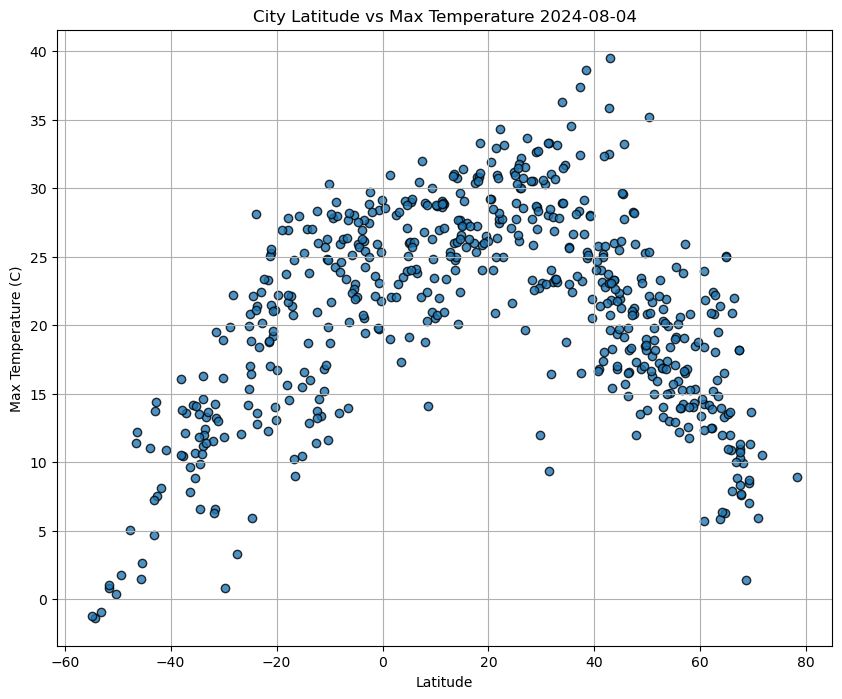

In [12]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

In [ ]:
# The scatter plot illustrates the relationship between latitude (on the x-axis) and maximum temperature (in Fahrenheit, on the y-axis). The results indicate that cities closer to the equator (Latitude 0) tend to have higher temperatures. However, as one moves farther from the equator, both northward and southward, temperatures decrease.


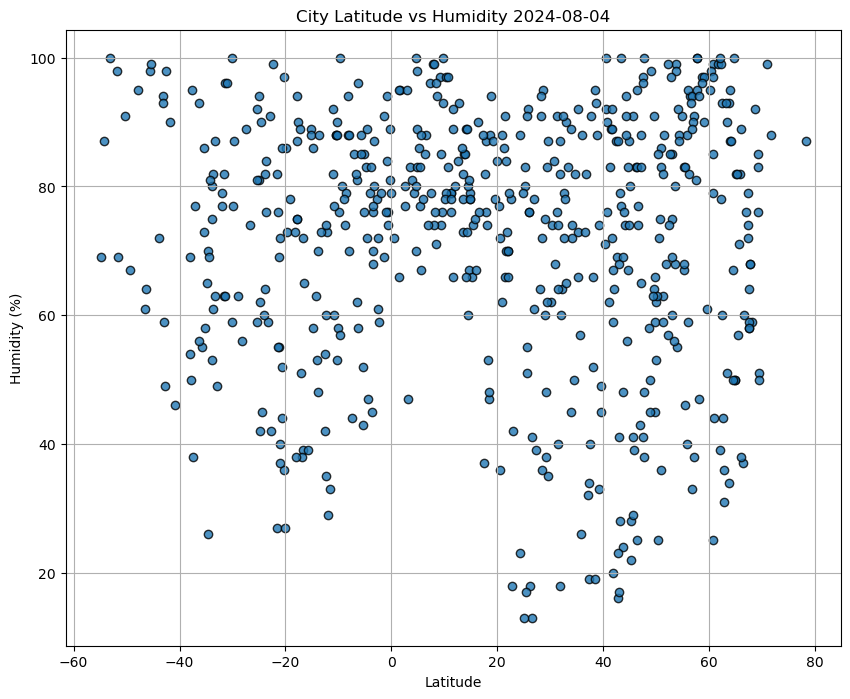

In [13]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()


In [ ]:
# The scatter plot above shows the relationship between humidity (%) and latitude. The data suggests that humidity is fairly evenly distributed across the plot. This indicates that high humidity can be observed in cities both close to and far from the equator.

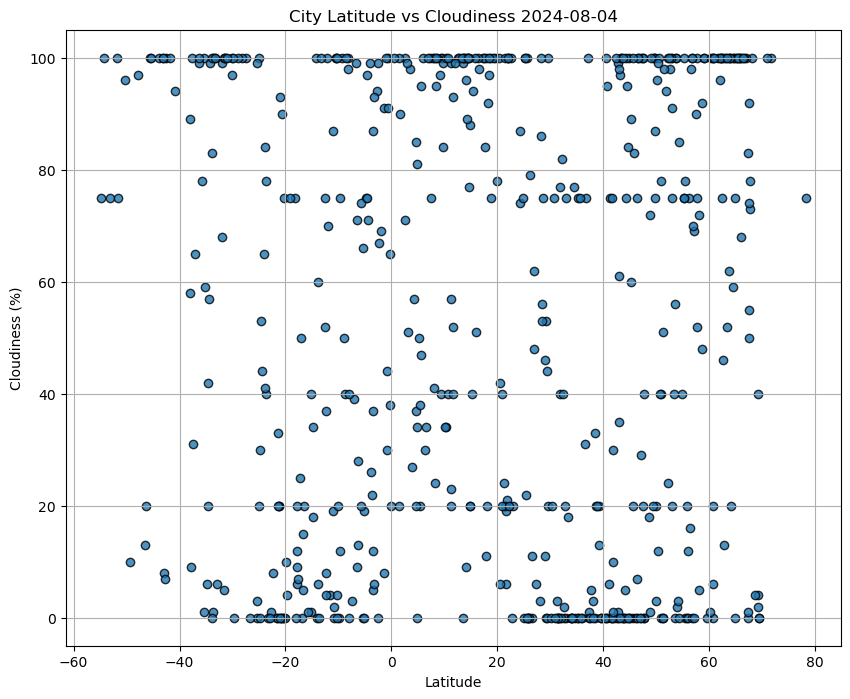

In [14]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()


In [ ]:
# The scatter plot above depicts the relationship between cloudiness and latitude. The data appears to be evenly distributed, indicating that there is no significant difference in cloudiness between cities that are closer to or farther from the equator (Latitude 0).

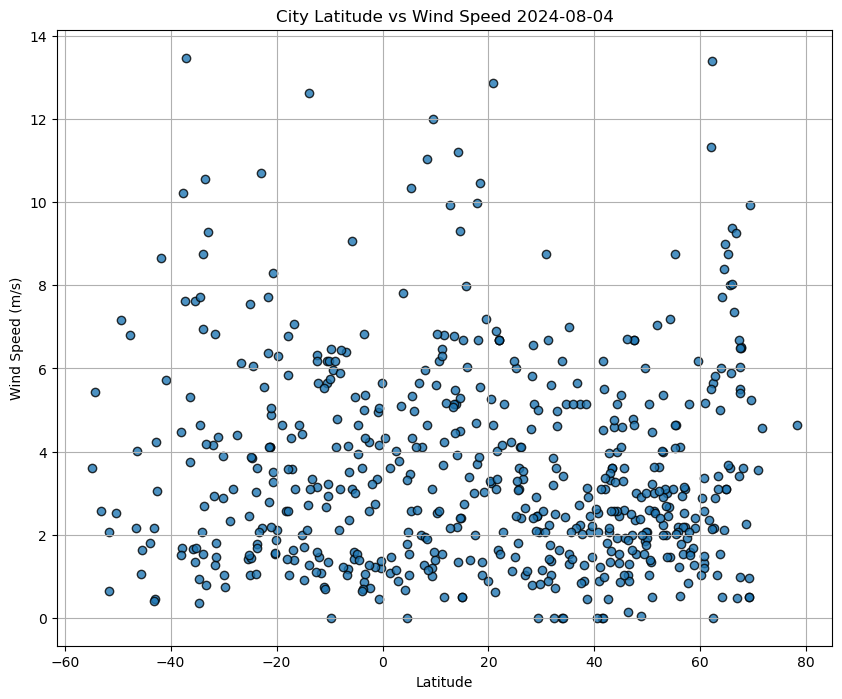

In [15]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()


In [ ]:
# The scatter plot above illustrates the relationship between wind speed (in mph) and latitude. The plot reveals that cities closer to the equator (latitude 0) experience lower wind speeds, while wind speeds tend to increase as cities move farther from the equator.

In [16]:
# Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")


In [18]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]


The r-squared is: 0.6135050905260669
The correlation between both factors is 0.78


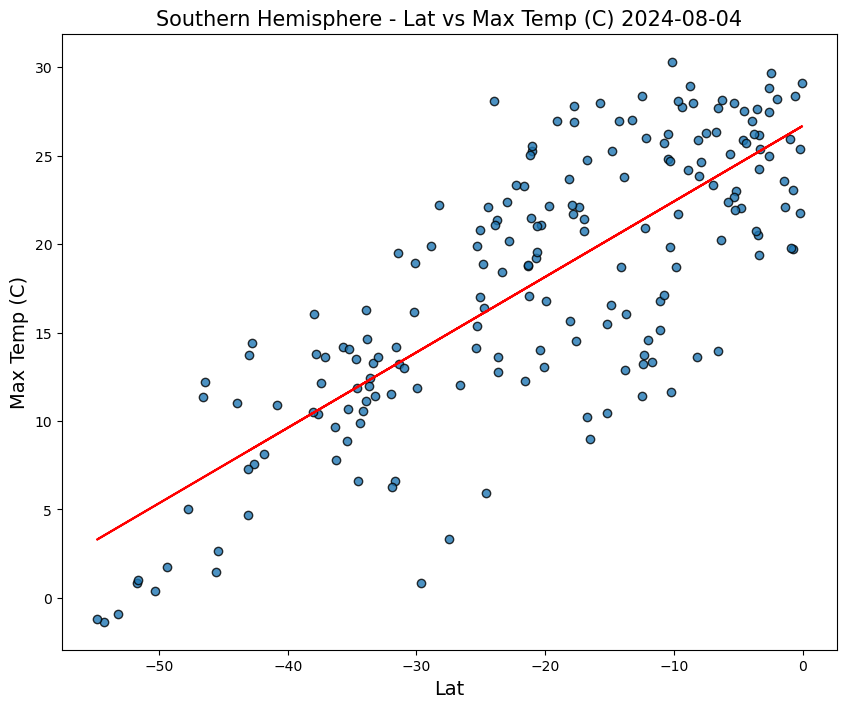

In [21]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (C)", "Southern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


The r-squared is: 0.4206044425129702
The correlation between both factors is -0.65


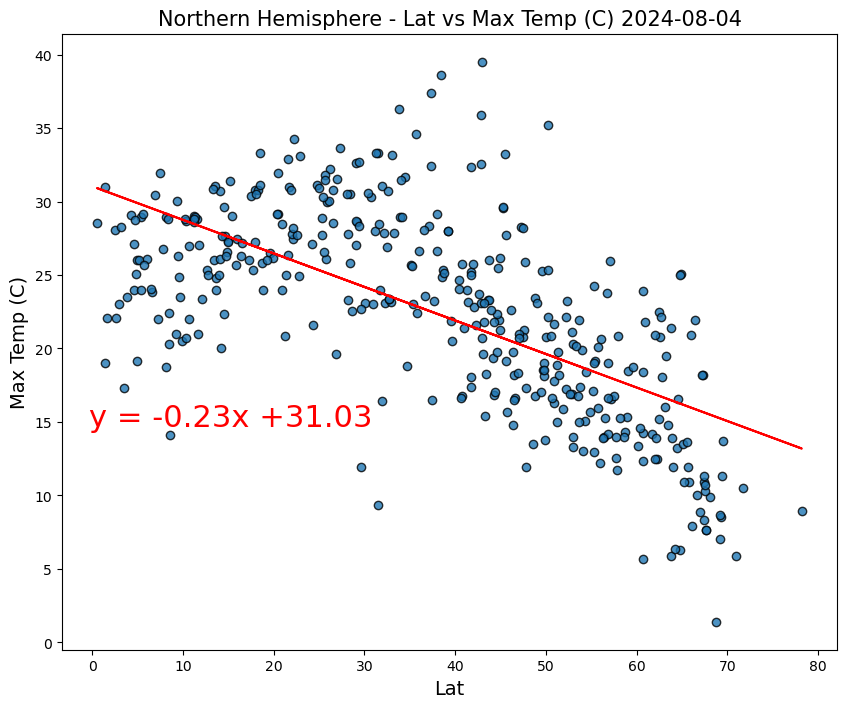

In [22]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (C)", "Northern",(0, 0))
plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


In [ ]:
#The plot above shows a linear regression model of maximum temperature versus latitude for cities in the Northern Hemisphere. The data reveals a strong negative correlation between maximum temperature and latitude, indicating that as cities move farther north from the equator (latitude 0), the maximum temperature (in Fahrenheit) decreases.

The r-squared is: 0.04082024108527222
The correlation between both factors is -0.2


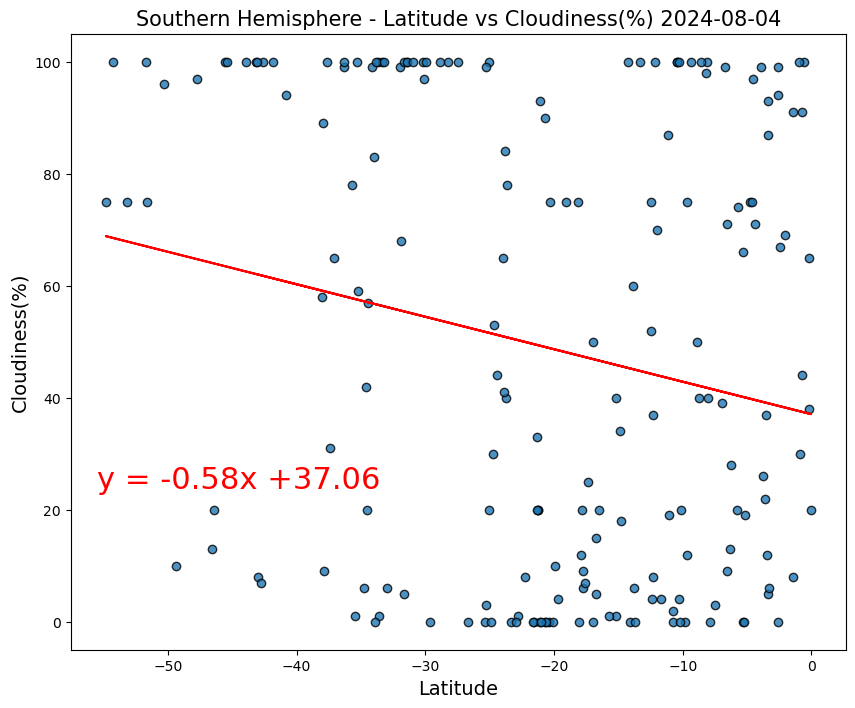

In [23]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


In [ ]:
#The plot above represents a linear regression model of maximum temperature versus latitude for cities in the Southern Hemisphere. The data indicates a very weak negative correlation between maximum temperature and latitude in these cities.

The r-squared is: 0.009591055280868442
The correlation between both factors is -0.1


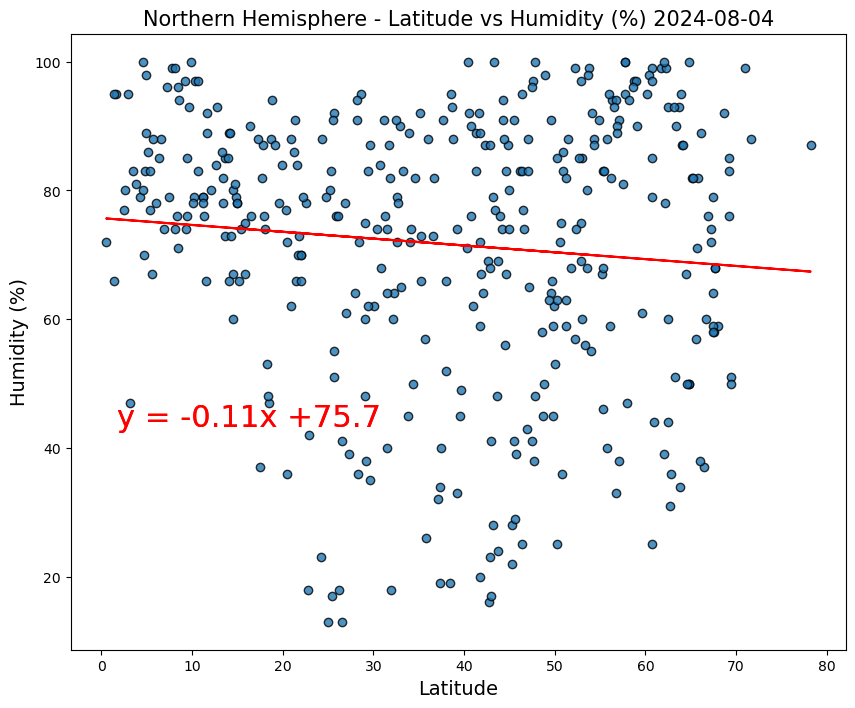

In [24]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()


In [ ]:
# The plot above shows a linear regression model of humidity (%) versus latitude for cities in the Northern Hemisphere. The data reveals a very weak negative correlation between humidity and latitude in these cities.

The r-squared is: 0.009591055280868442
The correlation between both factors is -0.1


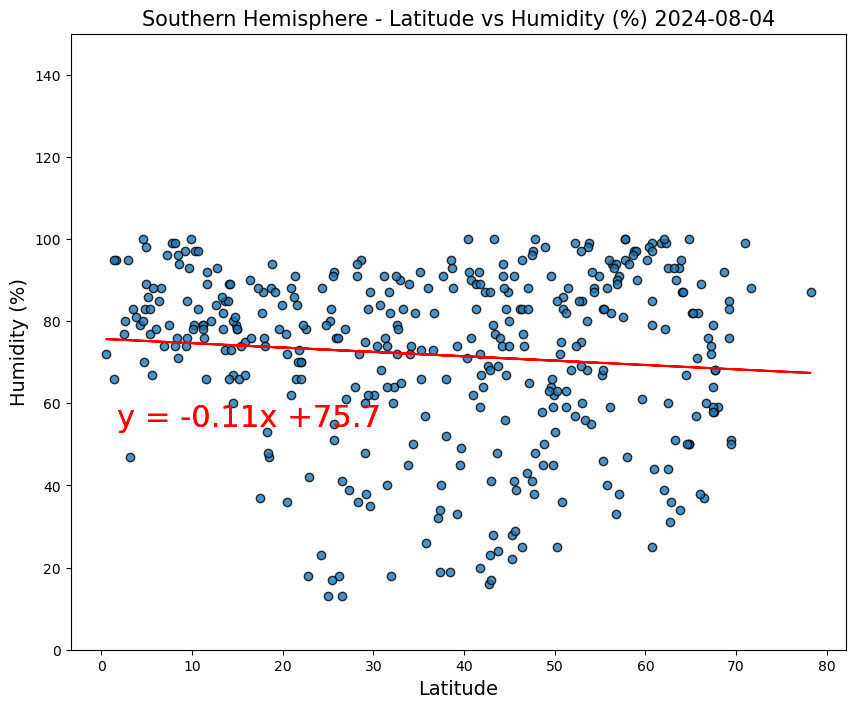

In [25]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


In [ ]:
# The plot above illustrates a linear regression model of humidity (%) versus latitude for cities in the Southern Hemisphere. The data indicates a very weak negative correlation between humidity and latitude in these cities.

The r-squared is: 0.001168213284359617
The correlation between both factors is -0.03


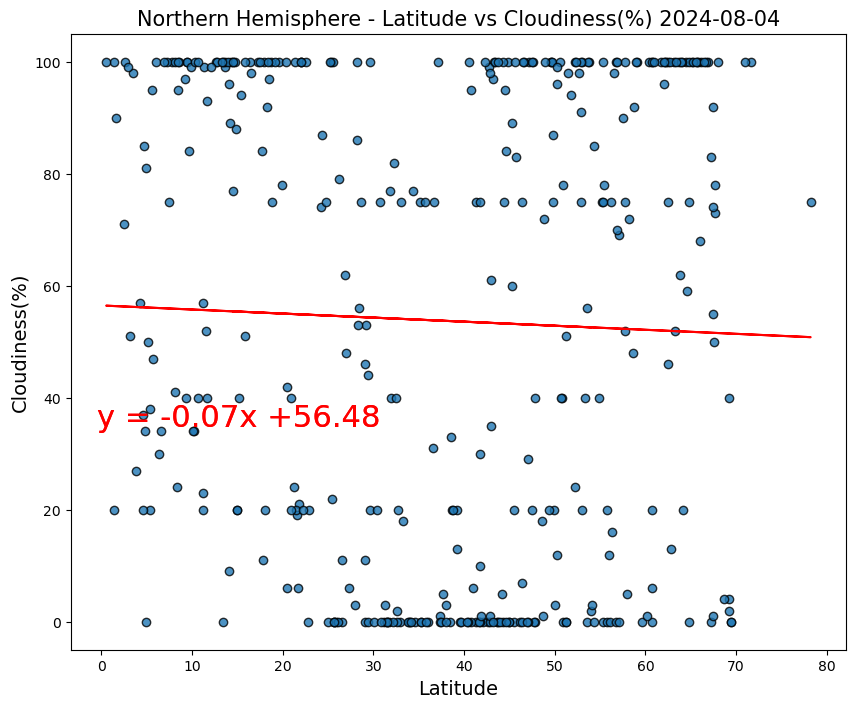

In [26]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()


In [ ]:
#The plot above depicts a linear regression model of cloudiness (%) versus latitude for cities in the Northern Hemisphere. The data reveals a very weak negative correlation between cloudiness and latitude in these cities.


The r-squared is: 0.04082024108527222
The correlation between both factors is -0.2


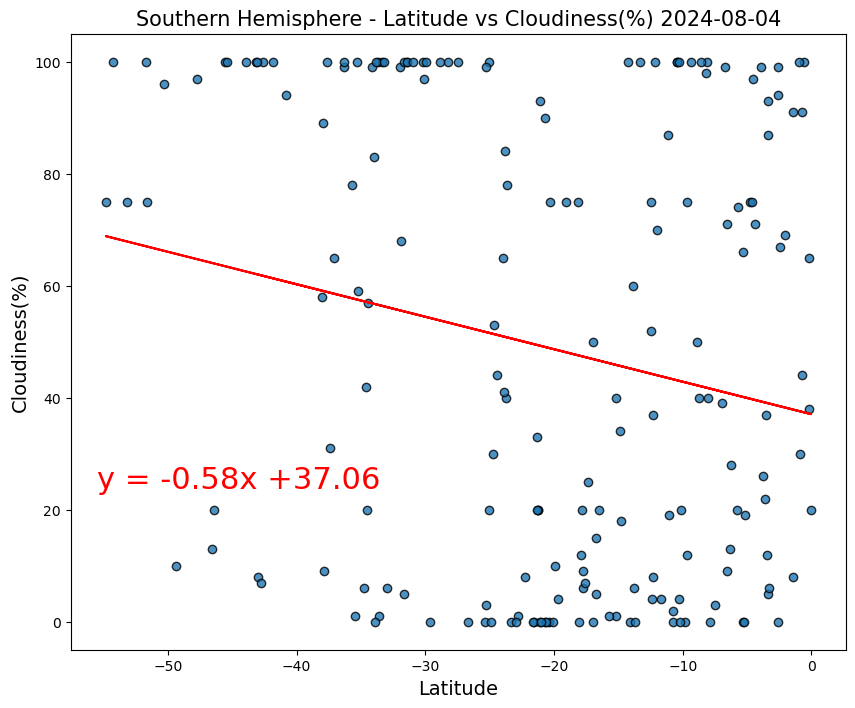

In [27]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()


In [ ]:
#The plot above shows a linear regression model of cloudiness (%) versus latitude for cities in the Southern Hemisphere. The data reveals a very weak negative correlation between cloudiness and latitude in these cities.

The r-squared is: 0.0009922156638352574
The correlation between both factors is -0.03


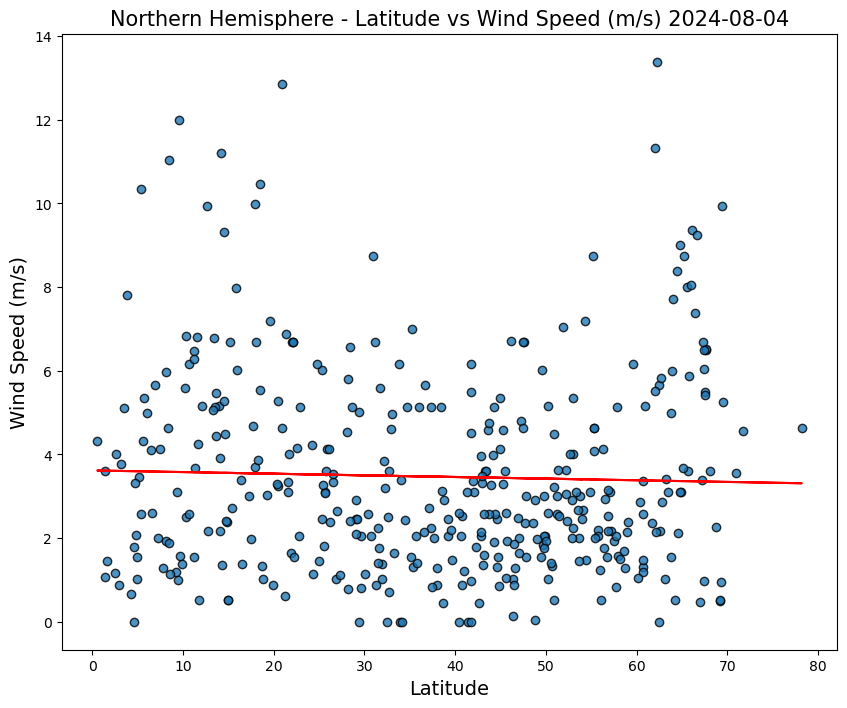

In [28]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()


In [ ]:
# The plot above depicts a linear regression model of wind speed (mph) versus latitude for cities in the Northern Hemisphere. The data shows a very weak positive correlation between wind speed and latitude in these cities.

The r-squared is: 0.0056079317624927105
The correlation between both factors is -0.07


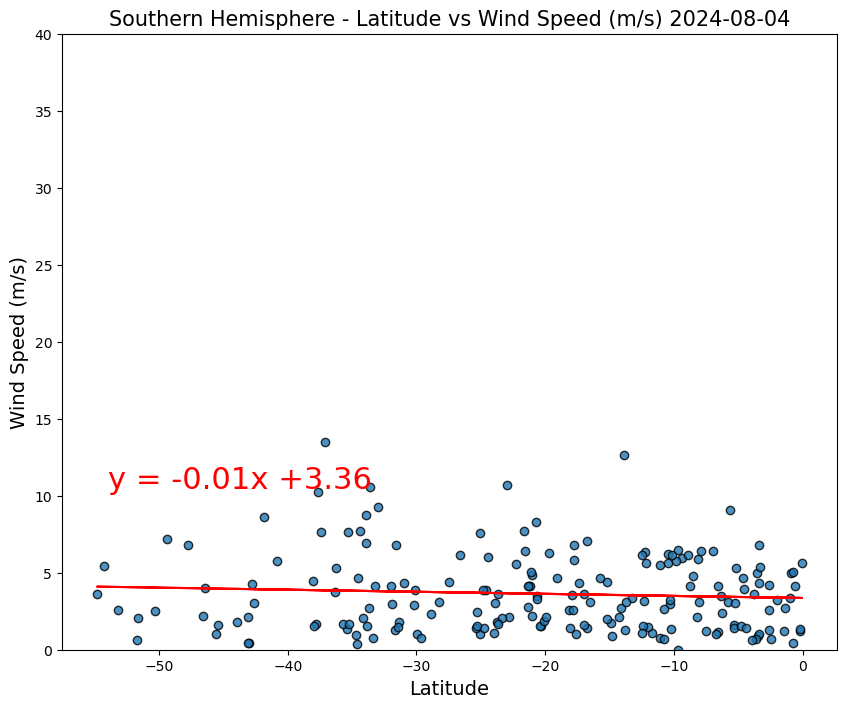

In [29]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()


In [ ]:
# The plot above illustrates a linear regression model of wind speed (mph) versus latitude for cities in the Southern Hemisphere. The data reveals a very weak negative correlation between wind speed and latitude in these cities.